# Week 2 tasks #

## Task 1: ##
In objective 1 you are asked to construct a HI, which represents a health
status. What part of the training data can be considered “healthy” and what
part of the training data can be considered “degraded”? How can you en-
code the two statuses?

## Answer: ##
A unit is healthy as long as the sensor measurements are static / within the normal range. As soon as they diverge from the normal range, the unit is considered degraded. The two statuses can be encoded as 0 (healthy) and 1 (degraded).

## Task 2: ##
In objective 2, you are asked to calculate RUL either directly or based on
the HI you constructed. What are the advantages and disadvantages of the
two approaches? When receiving test data, how does the process look like
from receiving the raw test data up to the calculated RUL value? Do you
use regression, classification or both in this process in order to predict RUL?

## Answer: ##
The advantage of calculating RUL directly is that it is a simple and straightforward approach. The disadvantage is that it is not very accurate. The advantage of calculating RUL based on the HI is that it is more accurate. The disadvantage is that it is more complex. When receiving test data, the process looks like this: 1. Preprocess the data (e.g. remove outliers, normalize the data, etc.) 2. Calculate the HI 3. Calculate the RUL based on the HI. We use regression to predict RUL.

As I see it, the HI would work as an additional input feature to the regression model. The model would then predict the RUL based on the HI and the other input features. The HI would indicate if the observed measurements are within the normal range or not. 

# Implementation #

In [27]:
# Packages
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np

In [28]:
## Import FD001 & remove empty columns

df_train_FD001 = pd.read_csv("train_FD001.txt", sep=" ", header = None)
df_train_FD001=df_train_FD001.drop([26,27], axis=1)
df_train_FD001.name = "train_FD001"
# Define header
header_txt = ["unit_number","time_cycle", "setting_1", "setting_2", "setting_3",
              "sensor_1", "sensor_2", "sensor_3","sensor_4","sensor_5","sensor_6", "sensor_7", "sensor_8", "sensor_9", 
              "sensor_10", "sensor_11", "sensor_12", "sensor_13", "sensor_14", "sensor_15", "sensor_16", "sensor_17", 
              "sensor_18", "sensor_19", "sensor_20", "sensor_21"] 
# Add header to datafile
df_train_FD001.columns = header_txt 
df_train_FD001['Degradation Classification'] = 0
df_train_FD001['RUL'] = 0

df_train_FD001.head()

,unit_number,time_cycle,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,Degradation Classification,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,0,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,0,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,0,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,0,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,0,0


In [29]:
remaining_names = ['sensor_2', 'sensor_3', 'sensor_4', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_13', 'sensor_14', 'sensor_20']
sensor_names = ['sensor_{}'.format(i+1) for i in range(0,21)]
# Remove unused sensors
drop_sensors = [element for element in sensor_names if element not in remaining_names]
X_train_pre = df_train_FD001.drop(drop_sensors, axis=1)
X_train_pre


,unit_number,time_cycle,setting_1,setting_2,setting_3,sensor_2,sensor_3,sensor_4,sensor_7,sensor_8,sensor_9,sensor_13,sensor_14,sensor_20,Degradation Classification,RUL
0,1,1,-0.0007,-0.0004,100.0,641.82,1589.70,1400.60,554.36,2388.06,9046.19,2388.02,8138.62,39.06,0,0
1,1,2,0.0019,-0.0003,100.0,642.15,1591.82,1403.14,553.75,2388.04,9044.07,2388.07,8131.49,39.00,0,0
2,1,3,-0.0043,0.0003,100.0,642.35,1587.99,1404.20,554.26,2388.08,9052.94,2388.03,8133.23,38.95,0,0
3,1,4,0.0007,0.0000,100.0,642.35,1582.79,1401.87,554.45,2388.11,9049.48,2388.08,8133.83,38.88,0,0
4,1,5,-0.0019,-0.0002,100.0,642.37,1582.85,1406.22,554.00,2388.06,9055.15,2388.04,8133.80,38.90,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,643.49,1597.98,1428.63,551.43,2388.19,9065.52,2388.26,8137.60,38.49,0,0
20627,100,197,-0.0016,-0.0005,100.0,643.54,1604.50,1433.58,550.86,2388.23,9065.11,2388.22,8136.50,38.30,0,0
20628,100,198,0.0004,0.0000,100.0,643.42,1602.46,1428.18,550.94,2388.24,9065.90,2388.24,8141.05,38.44,0,0
20629,100,199,-0.0011,0.0003,100.0,643.23,1605.26,1426.53,550.68,2388.25,9073.72,2388.23,8139.29,38.29,0,0


In [30]:
number_of_units = max(X_train_pre['unit_number'])
# Create empty lists
dataframes_units = []
critical_timepoints = []
# Loop over all units
for u in range(1, number_of_units+1):
    # Extract dataset for each unit
    X_1 = X_train_pre[X_train_pre['unit_number']==u]
    X_1.reset_index(drop=True, inplace=True)
    threshold = 0.00001
    timepoints = []
    # Loop over all remaining sensors
    for s in remaining_names:
        X_m = X_1[X_1['time_cycle'] <= 25]
        #Compute the mean of the firs 25 sensor values
        mean = X_m[s].mean()
        # Compute the running mean
        running_mean = X_1[s].rolling(window=25).mean()

        # Compute critical timepoint, where the relative deviation reaches a certain threshold
        timepoint_degraded = (abs(running_mean-mean)/mean > threshold)
        timepoint_degraded[max(X_1["time_cycle"])-1] = True

        # Take first time point where a sensor is not healthy`
        timepoints_edited =X_1[timepoint_degraded]['time_cycle']
        timepoint_degraded_min = min(timepoints_edited)
        timepoints.append(timepoint_degraded_min)

    # Find critical timepoint for whole unit (least of all sensors of that unit)
    critical_timepoint = min(timepoints)
    # Add new column to dataset which is 0 for healthy states and 1 for degraded
    X_1.loc[X_1['time_cycle']>= critical_timepoint,'Degradation Classification'] = 1

    # Add dataframe and critical timepoint to their corresponding lists
    dataframes_units.append(X_1)
    critical_timepoints.append(critical_timepoint)
    # Compute maximum time cycle
    time_cycle_max = max(X_1['time_cycle'])
    # Compute maximum RUL value
    RUL_max = time_cycle_max - critical_timepoint
    
    # Set the RUL value for all time cycles smaller than the critical timepoint to a constant value RULmax
    X_1.loc[X_1['time_cycle']< critical_timepoint,'RUL'] = RUL_max
    # Linearly decrease RUL value for remaining time cycles (until RUL = 0 at last time cycle point of each unit)
    X_1.loc[X_1['time_cycle']>= critical_timepoint,'RUL'] = np.arange(RUL_max,-1,-1)
    
# Merge adjusted dataframes from all units together
merged_dataframe = pd.concat(dataframes_units)

# Min-Max-Normalization   
number_of_sensors = len(remaining_names)
features=list(merged_dataframe.columns[2:(5+number_of_sensors)])  
min_max_scaler = MinMaxScaler(feature_range=(0,1))
merged_dataframe[features] = min_max_scaler.fit_transform(merged_dataframe[features])

# Save final dataframe in a csv file                                                                                         
merged_dataframe.to_csv('merged_dataframe_2.csv', index=False)

Text(0.5, 1.0, 'Unit 8 sensor_2')

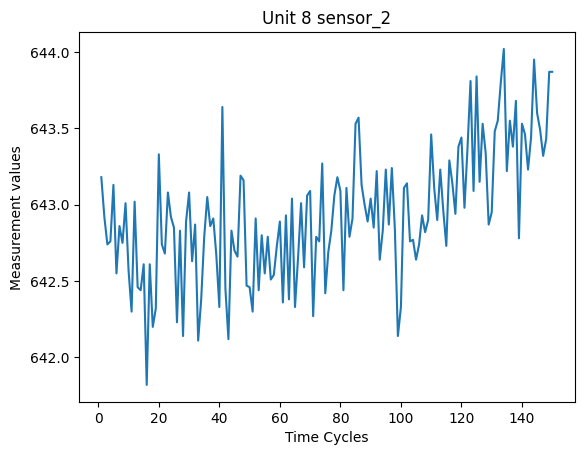

In [31]:
# Set unit number and sensor that should be plotted
unit_number = 8
sensor = 'sensor_2'
# Extract data from the defined unit number and save it in X_1
X_1 = X_train_pre[X_train_pre['unit_number']==unit_number]
# Plot values of sensor over time cycles
plt.plot(X_1['time_cycle'], X_1[sensor])
plt.xlabel('Time Cycles')
plt.ylabel('Measurement values')
plt.title('Unit %.f ' %unit_number + sensor)

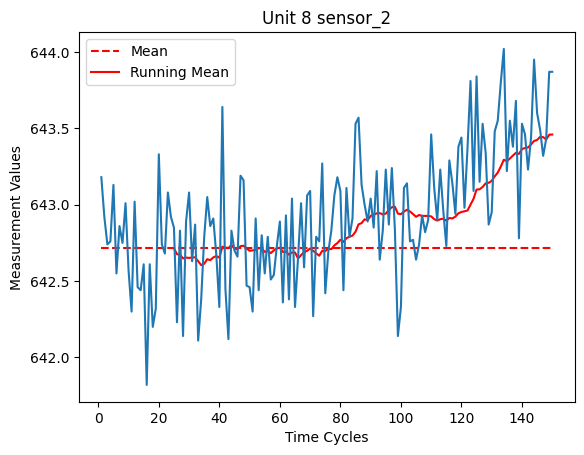

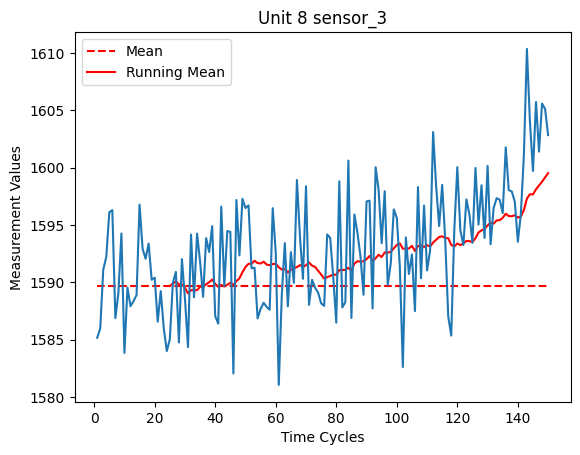

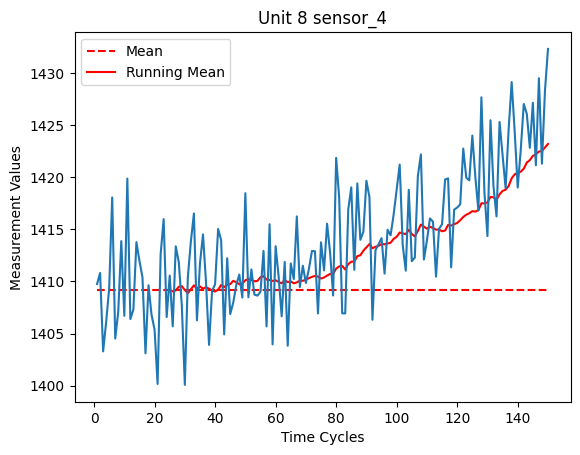

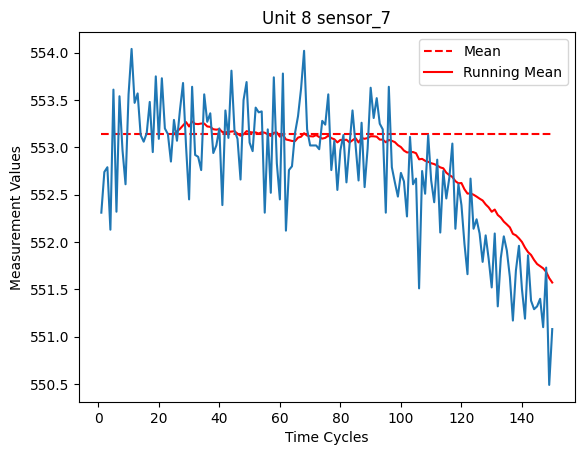

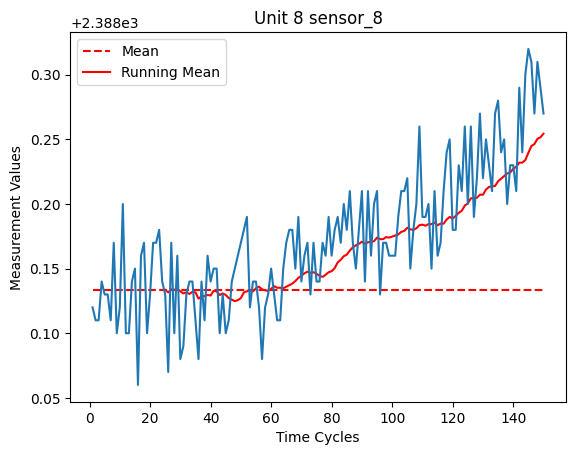

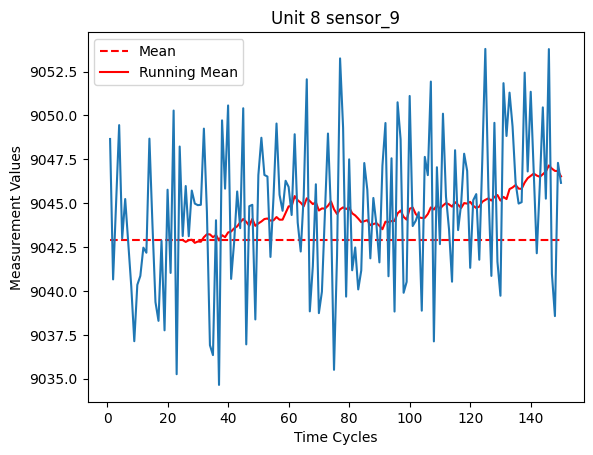

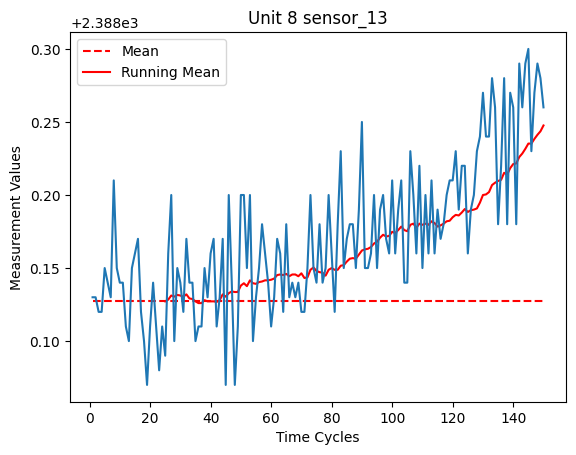

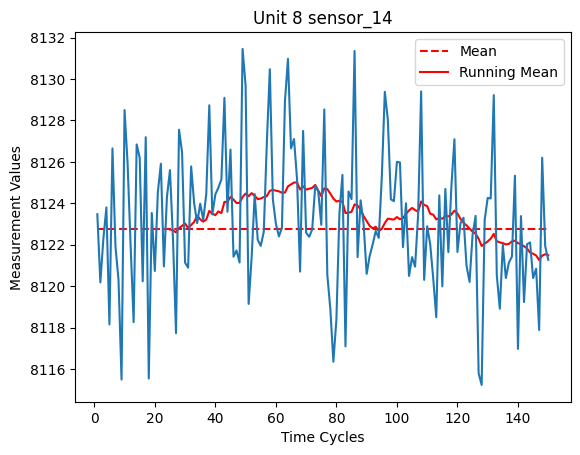

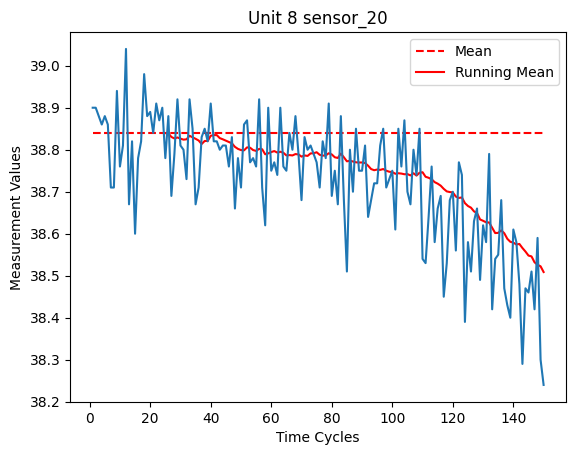

In [32]:
i=0
# Loop over all remaining sensors
for s in remaining_names:
    i = i+1
    X_m = X_1[X_1['time_cycle'] <= 25]
    # Compute the mean of the first 25 sensor values
    mean = X_m[s].mean()
    # Compute running mean
    running_mean = X_1[s].rolling(window=25).mean()
    # Plot sensor measurements, mean and running mean in an own figure for each sensor
    plt.figure(i)
    plt.plot(X_1['time_cycle'], [mean]*len(X_1['time_cycle']), 'r--', label='Mean')
    plt.plot(X_1['time_cycle'], running_mean, 'r-', label='Running Mean')
    plt.plot(X_1['time_cycle'], X_1[s])
    plt.legend()
    plt.xlabel('Time Cycles')
    plt.ylabel('Measurement Values')
    plt.title('Unit %.f ' %unit_number + s)

Degradation Threshold at 26 for sensor_2
Degradation Threshold at 26 for sensor_3
Degradation Threshold at 26 for sensor_4
Degradation Threshold at 26 for sensor_7
Degradation Threshold at 84 for sensor_8
Degradation Threshold at 26 for sensor_9
Degradation Threshold at 83 for sensor_13
Degradation Threshold at 27 for sensor_14
Degradation Threshold at 26 for sensor_20


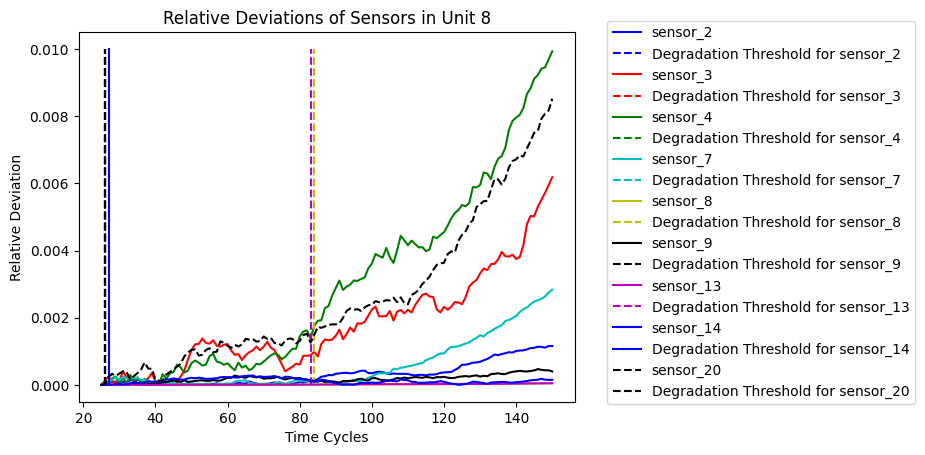

In [33]:
# Set parameters
colors_dashed = ['b--', 'r--', 'g--', 'c--', 'y--', 'k--', 'm--', 'b-', 'k--']
colors_full = ['b', 'r', 'g', 'c', 'y', 'k', 'm', 'b', 'k--' ]
color = 0
# Loop over all remaining sensors
for s in remaining_names:
    X_m = X_1[X_1['time_cycle'] <= 25]
    # Compute the mean of the first 25 sensor values
    mean = X_m[s].mean()
    # Compute the running mean
    running_mean = X_1[s].rolling(window=25).mean()
    # Plot relative deviation of running mean and mean
    plt.plot(X_1['time_cycle'], abs(running_mean-mean)/mean, colors_full[color], label=s)
    plt.xlabel('Time Cycles')
    plt.ylabel('Relative Deviation')
    plt.title('Relative Deviations of Sensors in Unit %.f' %unit_number)
    # Compute critical timepoint, where the relative deviation reaches a certain threshold
    timepoint_degraded = (abs(running_mean-mean)/mean > threshold)
    timepoint_degraded = min(X_1[timepoint_degraded]['time_cycle'])
    print('Degradation Threshold at %.f for ' %timepoint_degraded + s)
    # Plot vertical lines at critical timepoint in same color as the relative deviation of that sensor
    plt.plot([timepoint_degraded]*2, [0, 0.01], colors_dashed[color], label='Degradation Threshold for '+s)
    plt.legend(loc='upper right', bbox_to_anchor=(1.7, 1.05))
    color += 1


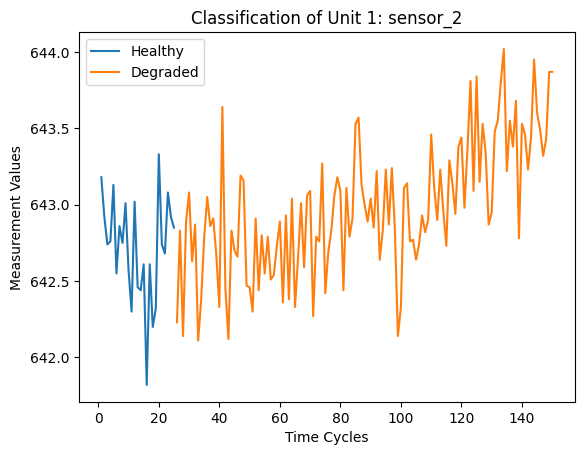

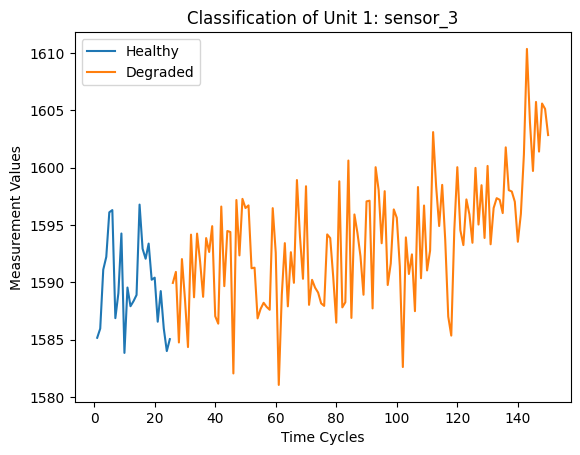

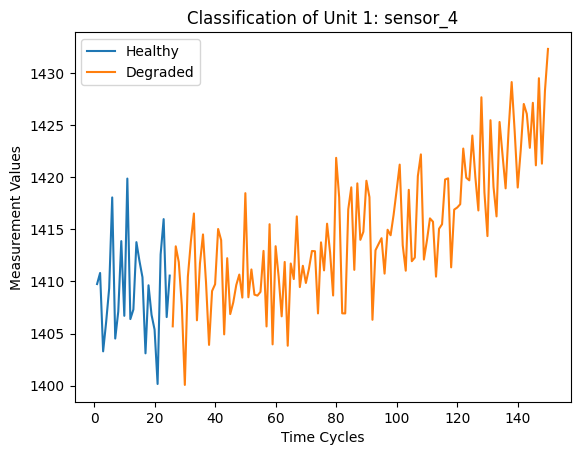

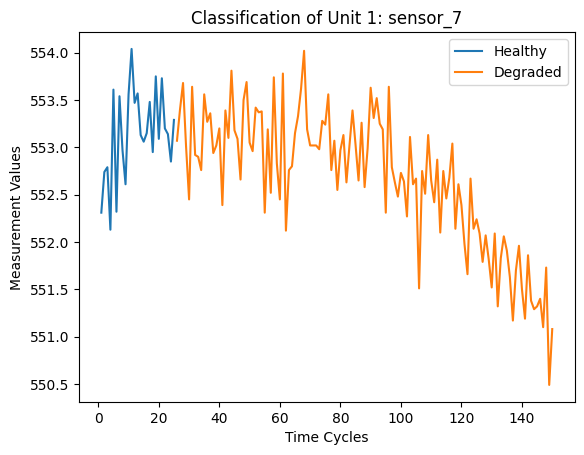

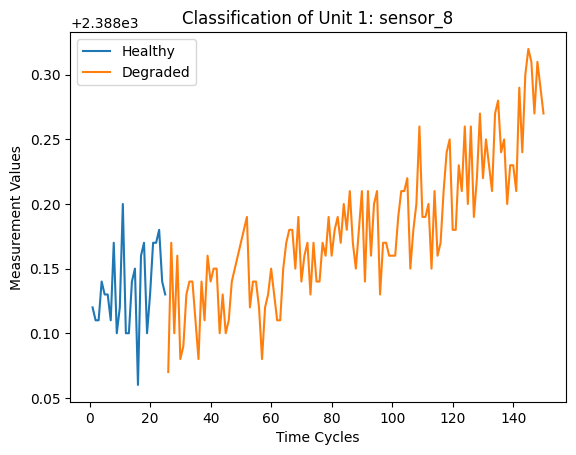

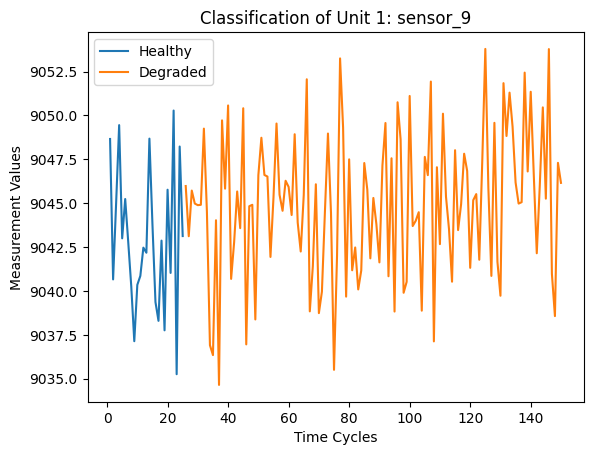

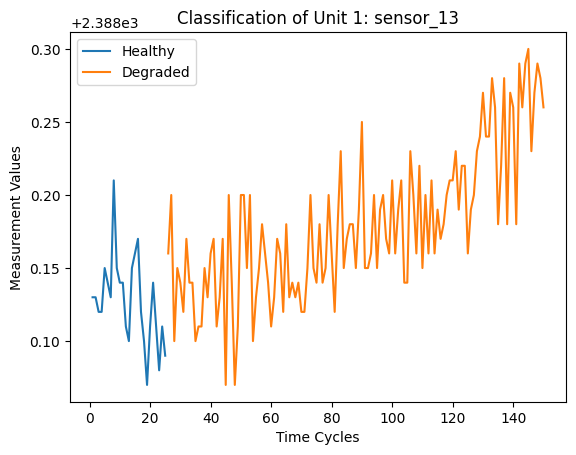

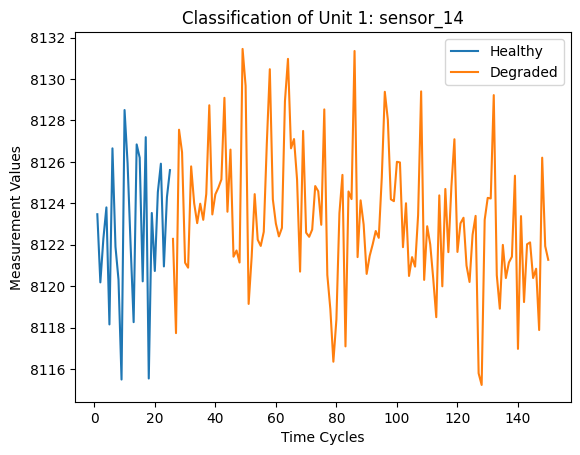

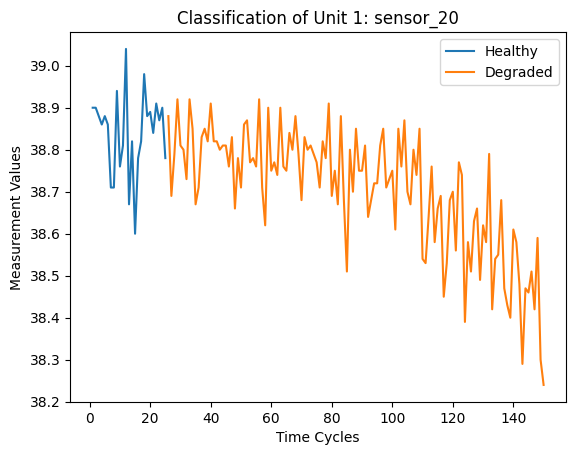

In [34]:
i = 0
timepoints = []
# Loop over all remaining sensors
for s in remaining_names:
    i+=1
    X_m = X_1[X_1['time_cycle'] <= 25]
    # Compute the mean of the first 25 sensor values
    mean = X_m[s].mean()
    # Compute the running mean
    running_mean = X_1[s].rolling(window=25).mean()
    # Compute critical timepoint, where the relative deviation reaches a certain threshold
    timepoint_degraded = (abs(running_mean-mean)/mean > threshold)
    timepoint_degraded = min(X_1[timepoint_degraded]['time_cycle'])
    timepoints.append(timepoint_degraded)
    # Split data into degraded and healthy data
    X_degraded = X_1[X_1['time_cycle'] >= min(timepoints)]
    X_healthy = X_1[X_1['time_cycle'] < min(timepoints)]
    # Plot sensor values in different colors for degraded and healthy
    plt.figure(i)
    plt.plot(X_healthy['time_cycle'], X_healthy[s], label='Healthy')
    plt.plot(X_degraded['time_cycle'], X_degraded[s], label='Degraded')
    plt.xlabel('Time Cycles')
    plt.ylabel('Measurement Values')
    plt.title('Classification of Unit 1: ' + s)
    plt.legend()
